# Ciencia de Datos
## 2º Cuatrimestre de 2017

## Módulo 2 - Series Temporales

## Integrantes:

- Fernández, Esteban - 691/12 - esteban.pmf@gmail.com
- Beccar García, Augusto - 267/13 - abg101@gmail.com
- Fadel, Uriel - 104/14 - urielfadel@gmail.com


## Introducción

En este trabajo analizamos datos capturados por un electroencefalograma sobre distintos pacientes. Estos aparatos reconocen la actividad eléctrica de nuestros cerebro a través de electrodos distribuidos en la cabeza de los sujetos y miden los voltajes que estos emiten a lo largo del tiempo. 
Mediante series temporales se busca procesar y analizar distintas métricas sobre los datos de los pacientes con el fin de establecer alguna relación significante repescto al nivel de reacción que los sujetos de muestran poseen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
from scipy.signal import welch
import seaborn as sb 
import scipy.stats as stats
import math
import collections

#Si se quiere probar con los pacientes S_i, cambiar la coleccion:
patients_files_to_be_used = ['P01.mat', 'P02.mat', 'P03.mat', 'P04.mat', 'P05.mat', 'P06.mat', 'P07.mat', 'P08.mat', 'P09.mat','P10.mat']
patientP01 = scipy.io.loadmat(patients_files_to_be_used[0])['data']


## Ejercicio 1: Análisis de frecuencias


## Ejercicio 1) a.1)

Calculamos las media de las potencia entre los electrodos más relevantes y utilizando Welch para descomponer la señal en varias frecuencias según lo enunciado por la transformada de Fourier mostramos un gráfico de frecuencias en el eje Y, epochs en el eje X y la media coloreada en un mapa de calor.

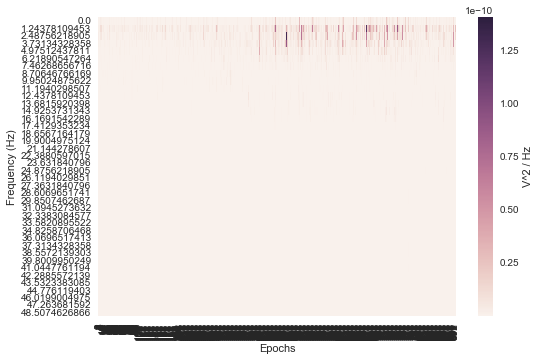

In [2]:
#Ejercicio 1) a.1)
patientP01 = scipy.io.loadmat(patients_files_to_be_used[0])['data']
avg_inter_5_electrods_by_epochs = patientP01[:,[8,44,80,131,185]].mean(axis=1)
frec, pot = welch(avg_inter_5_electrods_by_epochs, fs=250,nperseg = 201)
df = pd.DataFrame(data=np.transpose(pot[:,:40]), columns=np.arange(0,len(avg_inter_5_electrods_by_epochs)),index=frec[:40])
sb.heatmap(df, cbar_kws={'label': 'V^2 / Hz'})
plt.ylabel('Frequency (Hz)')
plt.xlabel('Epochs')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


## Ejercicio 1) a.2)

Calculamos la potencia media entre epochs para cada frecuencia y la graficamos en función de la frecuencia para cada canal.

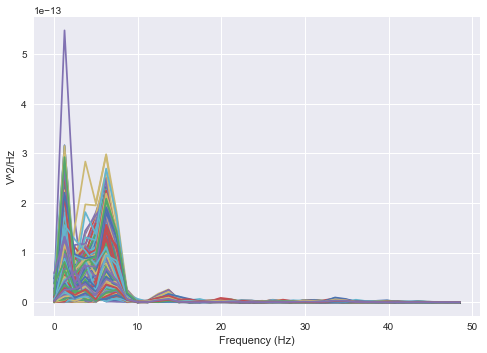

In [3]:
#Ejercicio 1) a.2)
avg_intra_electrods_by_epochs = patientP01.mean(axis=0)
frec, pot = welch(avg_intra_electrods_by_epochs, fs=250,nperseg = 201)
plt.plot(frec[:40], np.transpose(pot[:,:40]))
plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
plt.yticks(rotation=0)
plt.show()

## Ejercicio 1) b)

Promediamos la potencia de los epochs y electrodos para cada sujeto por cada banda de frencuencia.

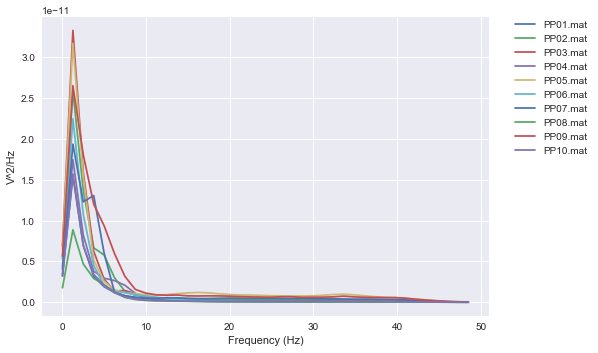

In [4]:
#Ejercicio 1) b)
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 40))

for index_file_name, file_name in enumerate(patients_files_to_be_used):
	current_patient_data = scipy.io.loadmat(file_name)['data']
	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[:40]
	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

for y_arr, label in zip(patient_x_pot_in_freq, patients_files_to_be_used):
    plt.plot(frec[:40], y_arr, label='P' + label)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
plt.yticks(rotation=0)
plt.show()

## Ejercicio 1) c)

Utilizando gráficos de categorías, mostramos la potencia de cada sujeto en la banda Alpha.

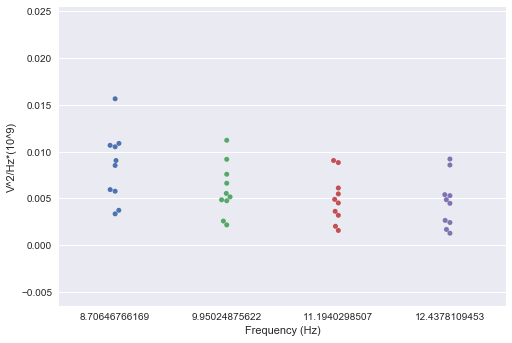

In [5]:
#Ejercicio 1) c)
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[7:11]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

plt.ylabel('V^2/Hz*(10^9)')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=(patient_x_pot_in_freq*10000000000),columns=frec[7:11])
sb.swarmplot(data=df)
plt.show()



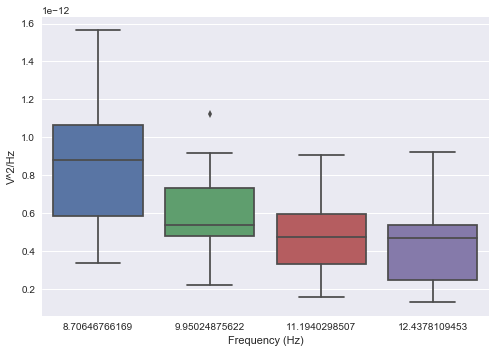

In [6]:
#Ejercicio 1) c)
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[7:11]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[7:11])
sb.boxplot(data=df)
plt.show()


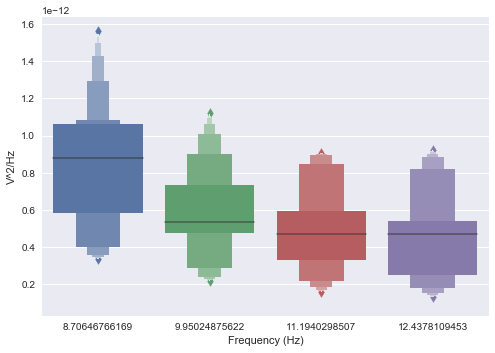

In [7]:
#Ejercicio 1) c)
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[7:11]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[7:11])
sb.lvplot(data=df)
plt.show()

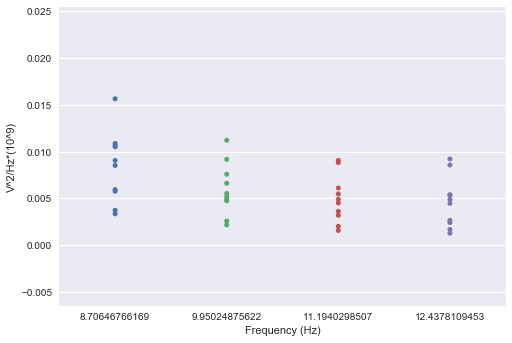

In [8]:
#Ejercicio 1) c)
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[7:11]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

plt.ylabel('V^2/Hz*(10^9)')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq*10000000000,columns=frec[7:11])
sb.stripplot(data=df)
plt.show()



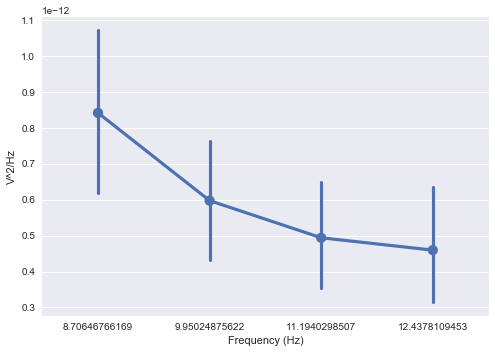

In [9]:
#Ejercicio 1) c)
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[7:11]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[7:11])
sb.pointplot(data=df)
plt.show()

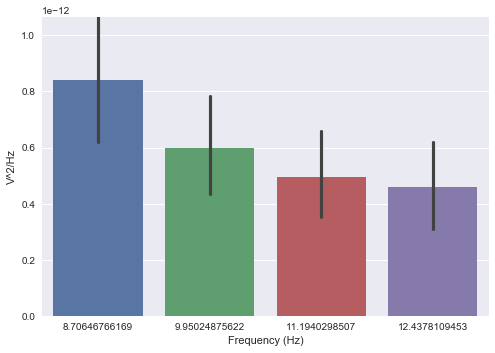

In [10]:
#Ejercicio 1) c)
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[7:11]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[7:11])
sb.barplot(data=df)
plt.show()

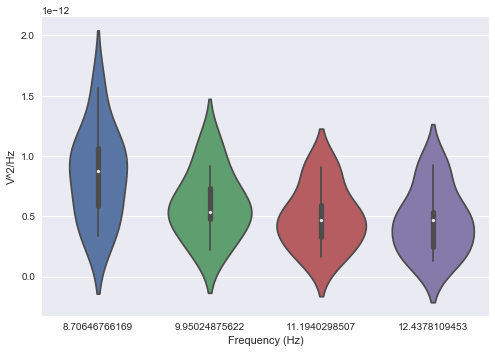

In [11]:
#Ejercicio 1) c)
#ALPHA #VIOLINPLOT
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[7:11]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[7:11])
sb.violinplot(data=df)
plt.show()

Recomendamos el violinplot ya que es uno de los que más información retiene. Parece tener en cuenta la media, la dispersión de los puntos y su agrupamiento, siendo así más suceptible a un cambio en la distribución de los datos, algo que por ejemplo el boxplot no cumple como bien lo ilustra este link del enunciado: https://www.autodeskresearch.com/publications/samestats.

## Ejercicio 1) d)

En este punto graficamos la potencia de cada sujeto en cada banda de frecuencia utilizando el violinplot.
Para testear si la poblacionan de las categorias provienen de la misma distribución, utilizamos el test de Kurskal debido a que no asume que las muestras posean la misma media o que provienen de una distribución normal. La hipótesis nula es que la mediana poblacional de todas las categorias es la misma.

KruskalResult(statistic=27.226829268292704, pvalue=5.2766760874838879e-06)


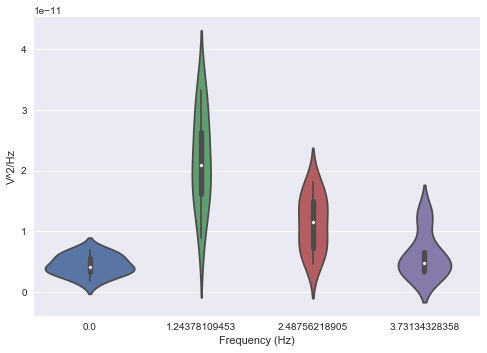

In [12]:
#Ejercicio 1) d)
#DELTA #VIOLINPLOT
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[0:4]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

pot_in_freq_x_patient = np.transpose(patient_x_pot_in_freq)
print (stats.kruskal(pot_in_freq_x_patient[0],pot_in_freq_x_patient[1],pot_in_freq_x_patient[2],pot_in_freq_x_patient[3]))

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[0:4])
sb.violinplot(data=df)
plt.show()

KruskalResult(statistic=11.434838709677422, pvalue=0.0032881856028082394)


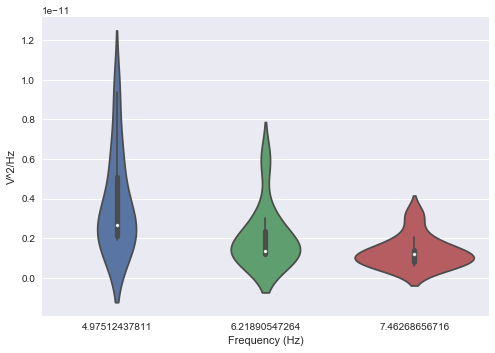

In [13]:
#Ejercicio 1) d)
#THETA #VIOLINPLOT
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 3))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[4:7]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

pot_in_freq_x_patient = np.transpose(patient_x_pot_in_freq)
print (stats.kruskal(pot_in_freq_x_patient[0],pot_in_freq_x_patient[1],pot_in_freq_x_patient[2]))

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,
                    columns=frec[4:7])
sb.violinplot(data=df)
plt.show()

KruskalResult(statistic=12.248757763975163, pvalue=0.6601107558528263)


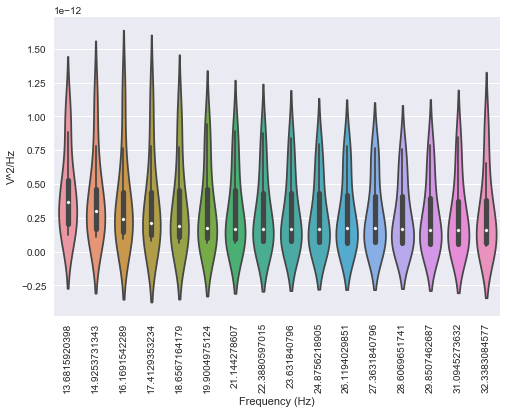

In [14]:
#Ejercicio 1) d)
#BETA #VIOLINPLOT
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 16))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[11:27]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

pot_in_freq_x_patient = np.transpose(patient_x_pot_in_freq)
print (stats.kruskal(pot_in_freq_x_patient[0],pot_in_freq_x_patient[1],pot_in_freq_x_patient[2],pot_in_freq_x_patient[3],
                    pot_in_freq_x_patient[4],pot_in_freq_x_patient[5],pot_in_freq_x_patient[6],pot_in_freq_x_patient[7],
                    pot_in_freq_x_patient[8],pot_in_freq_x_patient[9],pot_in_freq_x_patient[10],pot_in_freq_x_patient[11],
                    pot_in_freq_x_patient[12],pot_in_freq_x_patient[13],pot_in_freq_x_patient[14],pot_in_freq_x_patient[15]))

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[11:27])
sb.violinplot(data=df)
plt.xticks(rotation=90)

plt.show()


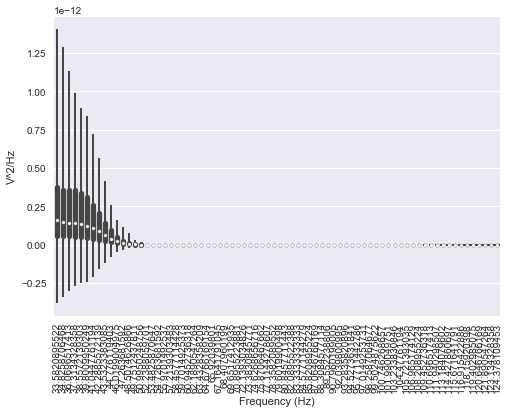

In [15]:
#Ejercicio 1) d)
#GAMMA #VIOLINPLOT
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 74))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
 	avg_pot_inter_electrod_by_epoch = pot.mean(axis=0).mean(axis=0)[27:]
 	patient_x_pot_in_freq[index_file_name] = np.transpose(avg_pot_inter_electrod_by_epoch)

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[27:])
sb.violinplot(data=df)
plt.xticks(rotation=90)
plt.show()

## Ejercicio 1) e)

En este item realizamos lo mismo que en los incisos b) y c) pero normalizando los valores de las potencias, esto es, para cada banda sumamos las potencias de sus correspondientes frecuencias y a eso lo dividimos por la suma de las potencias de todas las bandas de frecuencias.

In [16]:
def normalize_frequency_bands(pot):
	total_potency = pot.sum()
	alpha_band_potency = pot[:,:,0:4].sum()
	factor_alpha_band = alpha_band_potency / total_potency
	pot[:,:,0:4] = pot[:,:,0:4] * factor_alpha_band

	delta_band_potency = pot[:,:,4:7].sum()
	factor_delta_band = delta_band_potency / total_potency
	pot[:,:,4:7] = pot[:,:,4:7] * factor_delta_band

	theta_band_potency = pot[:,:,7:11].sum()
	factor_theta_band = theta_band_potency / total_potency
	pot[:,:,7:11] = pot[:,:,7:11] * factor_theta_band

	beta_band_potency = pot[:,:,11:27].sum()
	factor_beta_band = beta_band_potency / total_potency
	pot[:,:,11:27] = pot[:,:,11:27] * factor_alpha_band

	gamma_band_potency = pot[:,:,27:].sum()
	factor_gamma_band = gamma_band_potency / total_potency
	pot[:,:,27:] = pot[:,:,27:] * factor_gamma_band
	return pot

def calculate_discretization(x):
	iqr = scipy.stats.iqr(x)
	N = math.ceil((x.max() - x.min()) / (2*iqr*math.pow(len(x), -1/3)))
	bin_size = (x.max() - x.min()) / N
	bins = np.zeros((int(N),3))
	current_boundary = x.min()
	for i in range(0, int(N)):
		bins[i] = np.array([current_boundary, current_boundary + bin_size, 0])
		current_boundary = current_boundary + bin_size
    #Extended size for first and last bin due to precission issue.
	bins[int(N)-1][1] = bins[int(N)-1][1] + bin_size
	bins[0][0] = bins[0][0] - bin_size
	for i, v in enumerate(x):
		for bin_index in range(0, int(N)):
			current_bin = bins[bin_index] 
			if current_bin[0] <= v and v < current_bin[1]:
				current_bin[2] = current_bin[2] + 1
				x[i] = bin_index + 1
	return bins

KruskalResult(statistic=4.9009756097561024, pvalue=0.17919347123338439)


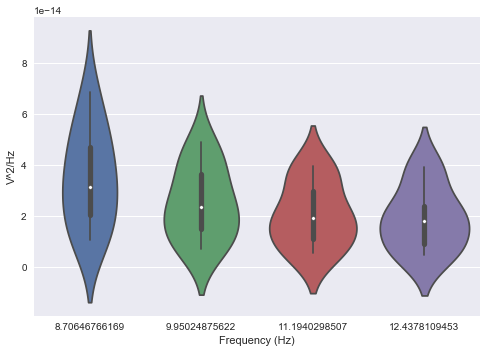

In [17]:
#Ejercicio 1) e)
#VIOLIN - Normalized ALPHA Frequency Band
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250, nperseg = 201)
 	total_potency = pot.sum()
 	alpha_potency = pot[:,:,7:11].sum()
 	factor_to_norm = alpha_potency / total_potency
 	patient_x_pot_in_freq[index_file_name] = (np.transpose((pot * factor_to_norm).mean(axis=0).mean(axis=0)[7:11]))

pot_in_freq_x_patient = np.transpose(patient_x_pot_in_freq)
print (stats.kruskal(pot_in_freq_x_patient[0],pot_in_freq_x_patient[1],pot_in_freq_x_patient[2],pot_in_freq_x_patient[3]))

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[7:11])
sb.violinplot(data=df)
plt.show()

KruskalResult(statistic=26.88439024390243, pvalue=6.2252286667589353e-06)


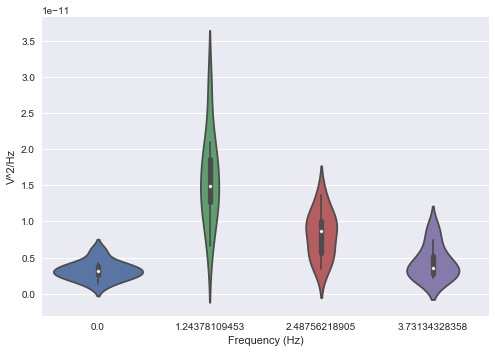

In [18]:
#Ejercicio 1) e)
#VIOLIN - Normalized DELTA Frequency Band
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 4))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250, nperseg = 201)
 	total_potency = pot.sum()
 	alpha_potency = pot[:,:,0:4].sum()
 	factor_to_norm = alpha_potency / total_potency
 	patient_x_pot_in_freq[index_file_name] = (np.transpose((pot * factor_to_norm).mean(axis=0).mean(axis=0)[0:4]))

pot_in_freq_x_patient = np.transpose(patient_x_pot_in_freq)
print (stats.kruskal(pot_in_freq_x_patient[0],pot_in_freq_x_patient[1],pot_in_freq_x_patient[2],pot_in_freq_x_patient[3]))

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[0:4])
sb.violinplot(data=df)
plt.show()

KruskalResult(statistic=8.8490322580645113, pvalue=0.011980006676007548)


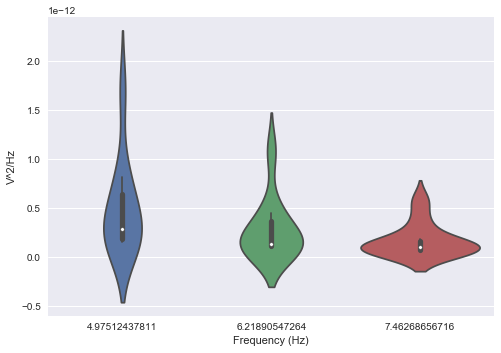

In [19]:
#Ejercicio 1) e)
#VIOLIN - Normalized THETA Frequency Band
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 3))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250, nperseg = 201)
 	total_potency = pot.sum()
 	alpha_potency = pot[:,:,4:7].sum()
 	factor_to_norm = alpha_potency / total_potency
 	patient_x_pot_in_freq[index_file_name] = (np.transpose((pot * factor_to_norm).mean(axis=0).mean(axis=0)[4:7]))

pot_in_freq_x_patient = np.transpose(patient_x_pot_in_freq)
print (stats.kruskal(pot_in_freq_x_patient[0],pot_in_freq_x_patient[1],pot_in_freq_x_patient[2]))

plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,columns=frec[4:7])
sb.violinplot(data=df)
plt.show()


KruskalResult(statistic=10.017577639751494, pvalue=0.81863278194853817)


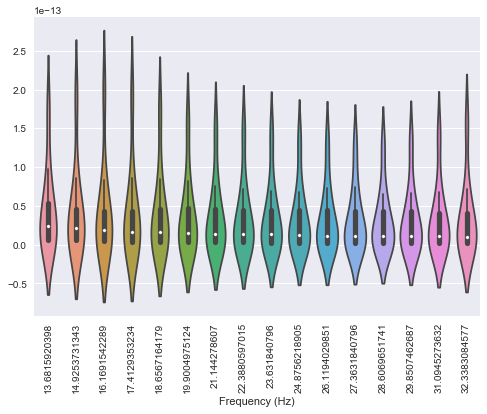

In [20]:
#Ejercicio 1) e)
#VIOLIN - Normalized BETA Frequency Band
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 16))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250, nperseg = 201)
 	total_potency = pot.sum()
 	alpha_potency = pot[:,:,11:27].sum()
 	factor_to_norm = alpha_potency / total_potency
 	patient_x_pot_in_freq[index_file_name] = (np.transpose((pot * factor_to_norm).mean(axis=0).mean(axis=0)[11:27]))

pot_by_freq_all_patients = np.transpose(patient_x_pot_in_freq)
print (stats.kruskal(pot_by_freq_all_patients[0],pot_by_freq_all_patients[1],pot_by_freq_all_patients[2],pot_by_freq_all_patients[3],
                    pot_by_freq_all_patients[4],pot_by_freq_all_patients[5],pot_by_freq_all_patients[6],pot_by_freq_all_patients[7],
                    pot_by_freq_all_patients[8],pot_by_freq_all_patients[9],pot_by_freq_all_patients[10],pot_by_freq_all_patients[11],
                    pot_by_freq_all_patients[12],pot_by_freq_all_patients[13],pot_by_freq_all_patients[14],pot_by_freq_all_patients[15]))

plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,
                    columns=frec[11:27])
sb.violinplot(data=df)
plt.xticks(rotation=90)
plt.show()

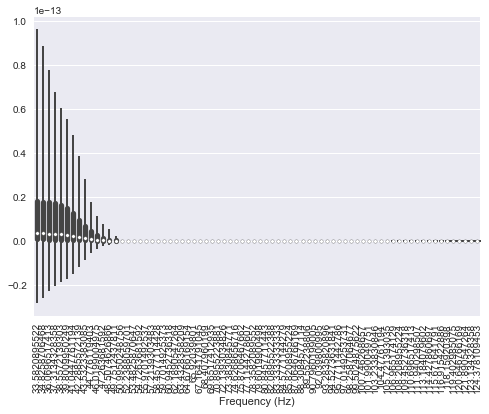

In [21]:
#Ejercicio 1) e)
#VIOLIN - Normalized GAMMA Frequency Band
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 74))
for index_file_name, file_name in enumerate(patients_files_to_be_used):
 	current_patient_data = scipy.io.loadmat(file_name)['data']
 	frec, pot = welch(current_patient_data, fs=250, nperseg = 201)
 	total_potency = pot.sum()
 	alpha_potency = pot[:,:,27:].sum()
 	factor_to_norm = alpha_potency / total_potency
 	patient_x_pot_in_freq[index_file_name] = (np.transpose((pot * factor_to_norm).mean(axis=0).mean(axis=0)[27:]))

plt.xlabel('Frequency (Hz)')
df = pd.DataFrame(data=patient_x_pot_in_freq,
                    columns=frec[27:])
sb.violinplot(data=df)
plt.xticks(rotation=90)
plt.show()

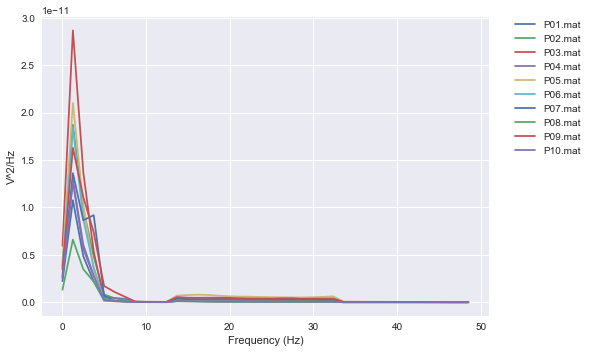

In [22]:
#Ejercicio 1) e) Ejercicio b)
#Normalized Frequency Bands
patient_x_pot_in_freq = np.zeros((len(patients_files_to_be_used), 40))

for index_file_name, file_name in enumerate(patients_files_to_be_used):
	current_patient_data = scipy.io.loadmat(file_name)['data']
	frec, pot = welch(current_patient_data, fs=250,nperseg = 201)
	pot = normalize_frequency_bands(pot)
	patient_x_pot_in_freq[index_file_name] = np.transpose(pot.mean(axis=0).mean(axis=0)[:40])

for y_arr, label in zip(patient_x_pot_in_freq, patients_files_to_be_used):
    plt.plot(frec[:40], y_arr, label=label)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('V^2/Hz')
plt.xlabel('Frequency (Hz)')
plt.yticks(rotation=0)
plt.show()

## Ejercicio 2: Análisis de información

In [23]:
def calculate_entrophy(bins, X, from_discrete):
	entrophy = 0
	for v in X:
		if from_discrete:
			quantity_of_apparitions_v = bins[v]
		else:
			quantity_of_apparitions_v = bins[int(v) - 1][2]
		probability = quantity_of_apparitions_v / float(len(X))
		entrophy = entrophy + probability * math.log(probability)
	return entrophy * -1

def intra_electrod_entrophy_median_for_patients(patients_files_to_use):
	patients_entrophies = np.zeros(len(patients_files_to_use) * 4)
	for file_index,file_name in enumerate(patients_files_to_use):
		current_patient_epochs = scipy.io.loadmat(file_name)['data'][:,[8,44,80,131]]
		for electrod_index in range(0, 4):
			electrod_entrophy_med = 0
			for epoch_index in range(0, len(current_patient_epochs)):
				epoch_discretization_bins = calculate_discretization(current_patient_epochs[epoch_index, electrod_index])
				electrod_entrophy_med += calculate_entrophy(epoch_discretization_bins, current_patient_epochs[epoch_index, electrod_index], False)
			patients_entrophies[electrod_index + file_index * 4] = electrod_entrophy_med / len(current_patient_epochs)
	return patients_entrophies

def define_new_chain_symbols(symbols1, symbols2):
	res = np.zeros(len(symbols1))
	i = 0
	for symbol_from_1, symbol_from_2 in zip(symbols1, symbols2):
		res[i] = int(str(int(symbol_from_1)) + str(int(symbol_from_2)))
		i += 1
	return res

def inter_two_electrods_entrophy_median_by_epochs_for_patients(patients_files_to_use):
	patients_entrophies = np.zeros(len(patients_files_to_use))
	for file_index, file_name in enumerate(patients_files_to_use):
		patient_entrophy_med = 0
		current_patient_epochs = scipy.io.loadmat(file_name)['data'][:,[8,44]]
		epochs_pair_inter_electrod = zip(current_patient_epochs[:,0], current_patient_epochs[:,1])
		for electrod_0_epoch, electrod_1_epoch in epochs_pair_inter_electrod:
			calculate_discretization(electrod_0_epoch)
			calculate_discretization(electrod_1_epoch)
			inter_electrod_epoch_symbols = define_new_chain_symbols(electrod_0_epoch, electrod_1_epoch)
			bins = collections.Counter(inter_electrod_epoch_symbols)
			patient_entrophy_med += calculate_entrophy(bins, inter_electrod_epoch_symbols, True)
		patients_entrophies[file_index] = patient_entrophy_med / len(current_patient_epochs)
	return patients_entrophies

## Ejercicio 2) a)

Calculamos la media de la entropia entre epochs por cada electrodo considerado importante y los graficamos utilizando el plot recomendado en el ejercicio anterior donde las categorías son el tipo de paciente. Para determinar si los datos provienen de la msima población hacemos uso del test estadístico de Kruskal como en la sección anterior. 

La hipótesis nula es que provienen de distribuciones iguales.

KruskalResult(statistic=59.259259259259295, pvalue=1.3820849047603384e-14)


/Users/estebanfernandez/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


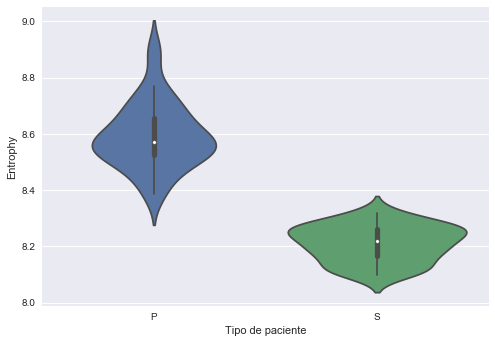

In [24]:
#Ejercicios 2) a) MEDIDA INTRA-ELECTRODO: Media de la entropia por cada electrodo relevante considerado (media entre epochs) 
P_files_to_use = ['P01.mat','P02.mat', 'P03.mat', 'P04.mat', 'P05.mat','P06.mat','P07.mat', 'P08.mat', 'P09.mat', 'P10.mat']
S_files_to_use = ['S01.mat', 'S02.mat', 'S03.mat','S04.mat','S05.mat', 'S06.mat', 'S07.mat', 'S08.mat','S09.mat', 'S10.mat']

electro_median_entrophies = np.zeros((2,len(P_files_to_use) * 4))

electro_median_entrophies[0] = intra_electrod_entrophy_median_for_patients(P_files_to_use)
electro_median_entrophies[1] = intra_electrod_entrophy_median_for_patients(S_files_to_use)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df = pd.DataFrame(data=np.transpose(electro_median_entrophies), columns=["P","S"])

pot_in_freq_x_patient = np.transpose(electro_median_entrophies)
print (stats.kruskal(electro_median_entrophies[0],electro_median_entrophies[1]))

sb.violinplot(data=df)

plt.ylabel('Entrophy')
plt.xlabel('Tipo de paciente')
plt.yticks(rotation=0)
plt.show()


Se observa que las entropias de los pacientes de tipo P (los que presentan un grado de consciencia reducido o nulo) poseen mayor entropía que los pacientes de tipo S (los normales). Esto creemos que puede deberse a que los primeros reaccionan solo en un comienzo y a bajas frecuencias presentando una alta potencia para luego no reaccionar, mientras que los del tipo S responden con mayor potencia a lo largo del tiempo.

El pvalue del test de Kruskal es menor a 0.05 por lo que estamos en condiciones de rechazar la hipótesis nula de que P y S provienen de la misma distribución.

## Ejercicio 2) b)
Calculamos la media de la entropia de la banda ALPHA entre epochs para los electrodos considerados importantes y lo graficamos. Luego realizamos el test de Kruskal con el fin de determinar si ambas muestras P y S provienen de la misma población.

KruskalResult(statistic=59.259259259259295, pvalue=1.3820849047603384e-14)


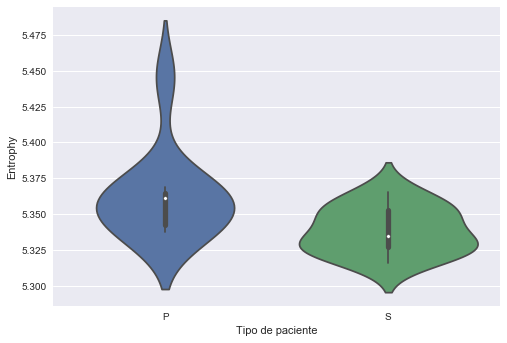

In [25]:
#Ejercicios 2) b) MEDIDA INTER-ELECTRODO: Entropia de la banda ALPHA (entre epochs) para los electrodos 8,44,80,131,185

P_files_to_use = ['P01.mat','P02.mat', 'P03.mat', 'P04.mat', 'P05.mat','P06.mat','P07.mat', 'P08.mat', 'P09.mat', 'P10.mat']
S_files_to_use = ['S01.mat', 'S02.mat', 'S03.mat','S04.mat','S05.mat', 'S06.mat', 'S07.mat', 'S08.mat','S09.mat', 'S10.mat']

patient_inter_electro_median_entrophies = np.zeros((2,len(P_files_to_use)))

patient_inter_electro_median_entrophies[0] = inter_two_electrods_entrophy_median_by_epochs_for_patients(P_files_to_use)
patient_inter_electro_median_entrophies[1] = inter_two_electrods_entrophy_median_by_epochs_for_patients(S_files_to_use)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df = pd.DataFrame(data=np.transpose(patient_inter_electro_median_entrophies), columns=["P","S"])

pot_in_freq_x_patient = np.transpose(electro_median_entrophies)
print (stats.kruskal(electro_median_entrophies[0],electro_median_entrophies[1]))

sb.violinplot(data=df)

plt.ylabel('Entrophy')
plt.xlabel('Tipo de paciente')
plt.yticks(rotation=0)
plt.show()


Por las mismas razones esgrimidas en el inciso anterior, los pacientes S presenetan una entropia media un tanto menor que las de los pacientes P.

El pvalue del test de Kruskal es menor a 0.05 y por lo tango podemos rechazar la hipótesis nula de que las muestras P y S provienen de poblaciones con igual distribución.